### Analise exploratoria de dados

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregar os dados
df = pd.read_csv('funcionarios_ti_nomes.csv')
df.head()

,Nome,Cargo,Salário,Cidade,Estado,País
0,Camila Rocha,Scrum Master,21876,Florianópolis,SC,Brasil
1,João Vitor Ferreira,Analista de Redes,5420,Buenos Aires,Buenos Aires,Argentina
2,Juan Ribeiro,Analista de Suporte,13862,Fortaleza,CE,Brasil
3,Paulo da Cunha,Analista de Redes,23171,Buenos Aires,Buenos Aires,Argentina
4,Ana Vitória Freitas,Gerente de TI,7512,Rio de Janeiro,RJ,Brasil


### Distribuição de Salários na Área de TI


Objetivo: Ver como os salários estão distribuídos, verificar a média, mediana e a presença de outliers.

 Estatística Básica

In [79]:

# Estatisticas descritivas dos salarios 

df['Salário'].describe() # Me traz todas as estatisticas descritivas

count      200.000000
mean     14241.760000
std       6131.114107
min       4117.000000
25%       8948.000000
50%      14520.500000
75%      19082.250000
max      24793.000000
Name: Salário, dtype: float64

Boxplot para Identificação de Outliers

<Figure size 1000x600 with 0 Axes>

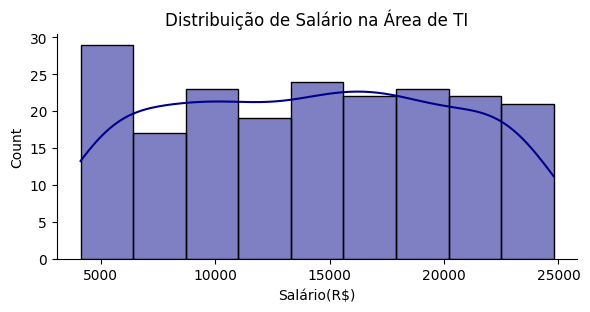

In [80]:
plt.figure(figsize=(10, 6))

sns.displot(x=df['Salário'],height=3, aspect=2, color='darkblue' , kde=True)

plt.title('Distribuição de Salário na Área de TI')
plt.xlabel('Salário(R$)')

plt.show()


### Criar um Histograma para Visualizar a Distribuição 

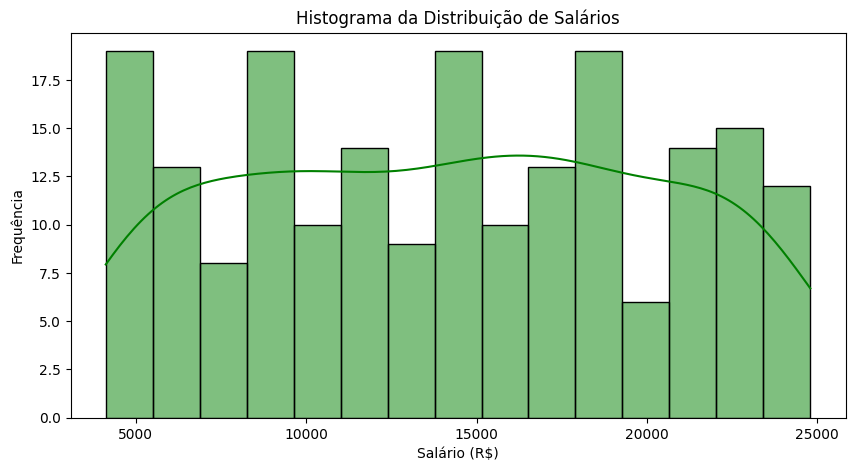

In [81]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Salário'], bins=15 , kde=True, color= 'green')

plt.title('Histograma da Distribuição de Salários')
plt.xlabel('Salário (R$)')
plt.ylabel('Frequência')
plt.show()

 Verificar a Presença de Outliers

In [83]:
q1 = df['Salário'].quantile(0.25)
q3 = df['Salário'].quantile(0.75)
iqr = q3 - q1 #intervalo interquartil

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr


# Filtrar os outliers

outliers = df[(df["Salário"] < limite_inferior) | (df["Salário"] > limite_superior)]

outliers
print(f"Quantidade de outliers: {len(outliers)}")

Quantidade de outliers: 0


#### Análise: Salário Médio por Cargo

Objetivo: Descobrir quais cargos pagam mais e quais têm salários mais baixos.



In [ ]:
# Verficando os dados e colunas


df.head()

,Nome,Cargo,Salário,Cidade,Estado,País
0,Camila Rocha,Scrum Master,21876,Florianópolis,SC,Brasil
1,João Vitor Ferreira,Analista de Redes,5420,Buenos Aires,Buenos Aires,Argentina
2,Juan Ribeiro,Analista de Suporte,13862,Fortaleza,CE,Brasil
3,Paulo da Cunha,Analista de Redes,23171,Buenos Aires,Buenos Aires,Argentina
4,Ana Vitória Freitas,Gerente de TI,7512,Rio de Janeiro,RJ,Brasil


In [ ]:
# Media de salario por cargo

salario_por_cargo = df.groupby('Cargo')['Salário'].mean().sort_values(ascending=False)

salario_por_cargo

Cargo
DevOps Engineer              16906.000000
Engenheiro de Dados          16609.882353
Arquiteto de Software        15016.500000
Analista de Suporte          14927.650000
Desenvolvedor Backend        14744.238095
Administrador de Sistemas    14382.933333
Cientista de Dados           14162.937500
Gerente de TI                13524.300000
Scrum Master                 13380.600000
Analista de Segurança        12918.357143
Desenvolvedor Frontend       12729.473684
Analista de Redes            12486.285714
Name: Salário, dtype: float64

## Visualizar com um gráfico de barras

#### O que esse gráfico mostra?

A hierarquia salarial entre os cargos.

Diferença entre os melhores e piores salários.

Se a curva salarial faz sentido para o mercado.


/tmp/ipykernel_10433/1411230753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salario_por_cargo.values, y=salario_por_cargo.index, palette='viridis')


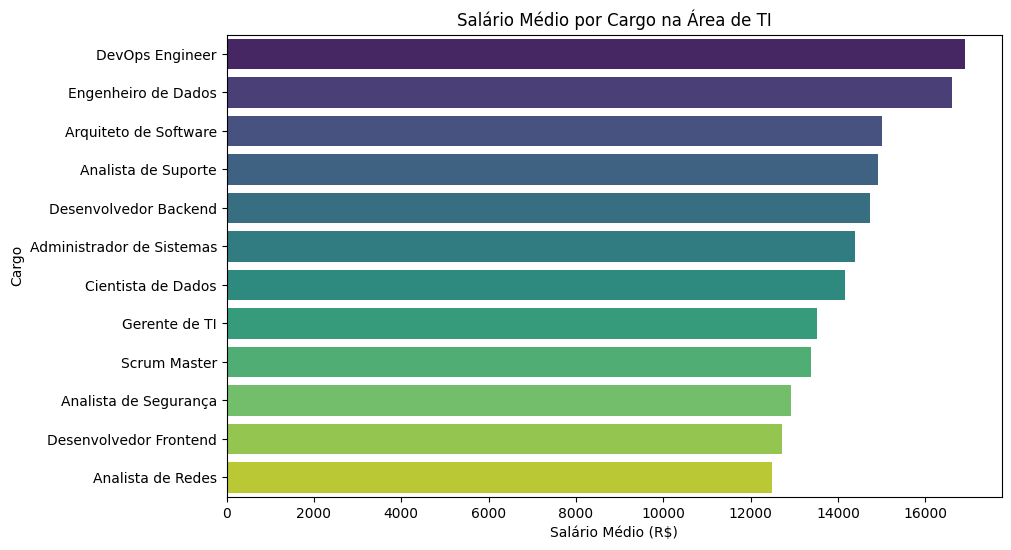

In [92]:
plt.figure(figsize=(10, 6))

sns.barplot(x=salario_por_cargo.values, y=salario_por_cargo.index, palette='viridis')

plt.title('Salário Médio por Cargo na Área de TI')
plt.xlabel('Salário Médio (R$)')
plt.show()

### Comparação de Médias Geral

Isso cria uma tabela onde os cargos acima da média ficam verdes e os abaixo vermelhos.

In [109]:
media_geral = df['Salário'].mean()
print(f'Sálario médio geral : R$ {media_geral:.2f}')

# Comparação de cada cargo com a media

df_media = salario_por_cargo.to_frame().reset_index()

df_media['Acima da Média?'] = df_media['Salário'] > media_geral

df_media.style.applymap(lambda x: "background-color: green" if x else "background-color: red", subset=["Acima da Média?"])

Sálario médio geral : R$ 14241.76


/tmp/ipykernel_10433/819001233.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_media.style.applymap(lambda x: "background-color: green" if x else "background-color: red", subset=["Acima da Média?"])


,Cargo,Salário,Acima da Média?
0,DevOps Engineer,16906.000000,True
1,Engenheiro de Dados,16609.882353,True
2,Arquiteto de Software,15016.500000,True
3,Analista de Suporte,14927.650000,True
4,Desenvolvedor Backend,14744.238095,True
5,Administrador de Sistemas,14382.933333,True
6,Cientista de Dados,14162.937500,False
7,Gerente de TI,13524.300000,False
8,Scrum Master,13380.600000,False
9,Analista de Segurança,12918.357143,False


### Análise: Distribuição Geográfica dos Funcionários

 Objetivo: Descobrir onde há maior concentração de profissionais de TI.

In [110]:
 # Verificar se As colunas estão no formato correto

df.head()

,Nome,Cargo,Salário,Cidade,Estado,País
0,Camila Rocha,Scrum Master,21876,Florianópolis,SC,Brasil
1,João Vitor Ferreira,Analista de Redes,5420,Buenos Aires,Buenos Aires,Argentina
2,Juan Ribeiro,Analista de Suporte,13862,Fortaleza,CE,Brasil
3,Paulo da Cunha,Analista de Redes,23171,Buenos Aires,Buenos Aires,Argentina
4,Ana Vitória Freitas,Gerente de TI,7512,Rio de Janeiro,RJ,Brasil


/tmp/ipykernel_10433/868381059.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cidades_comuns.values, y=cidades_comuns.index, palette='coolwarm')


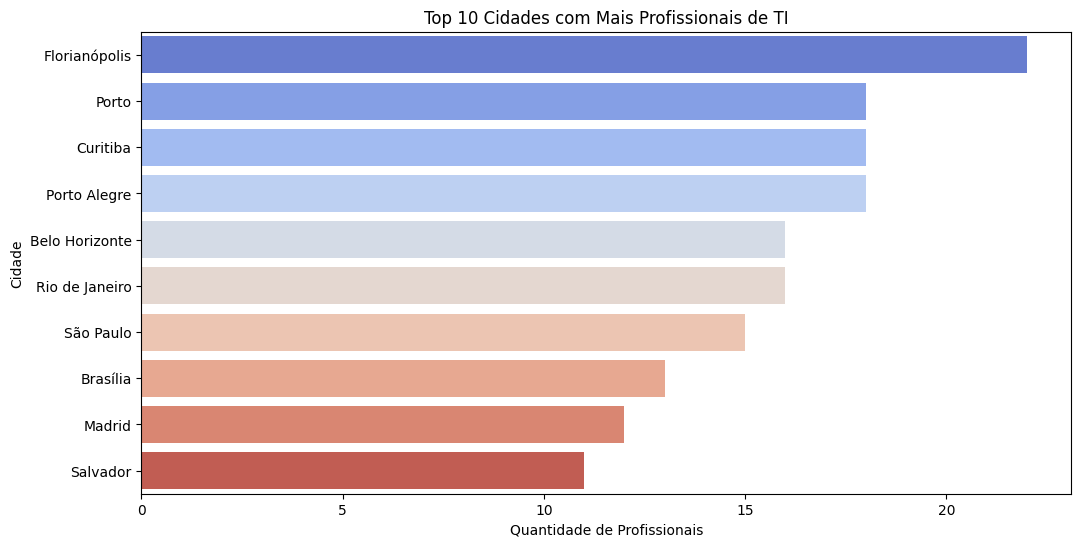

In [111]:
cidades_comuns = df['Cidade'].value_counts().head(10)


# Grafico

plt.figure(figsize=(12, 6))

sns.barplot(x=cidades_comuns.values, y=cidades_comuns.index, palette='coolwarm')

plt.title('Top 10 Cidades com Mais Profissionais de TI') 
plt.xlabel('Quantidade de Profissionais')
plt.ylabel('Cidade')
plt.show()

### Distribuição por Estados

/tmp/ipykernel_10433/386522309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estados_comuns.values , y=estados_comuns.index, palette='Blues_r')


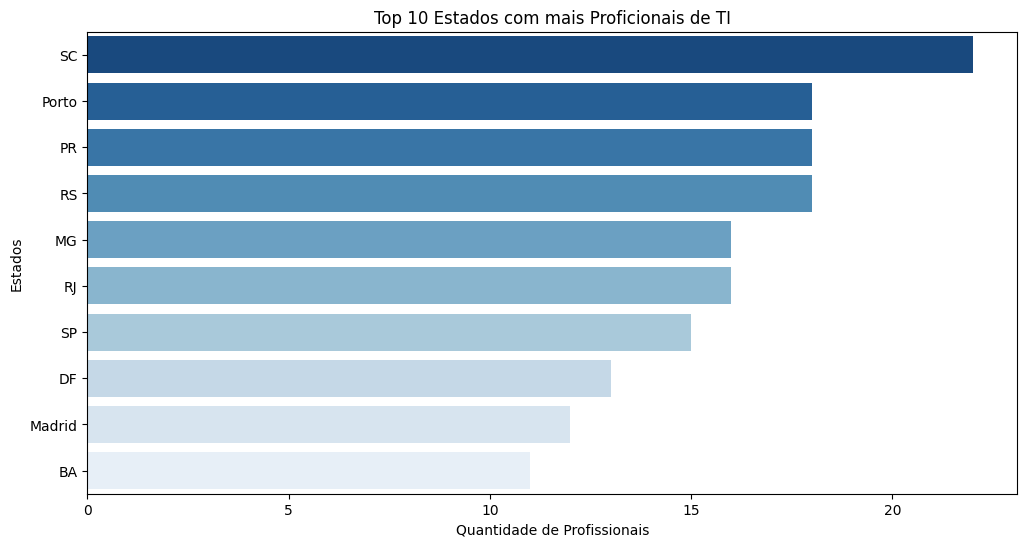

In [121]:
estados_comuns = df['Estado'].value_counts().head(10)

# Grafico
plt.figure(figsize=(12, 6))

sns.barplot(x=estados_comuns.values , y=estados_comuns.index, palette='Blues_r')

plt.title('Top 10 Estados com mais Proficionais de TI')
plt.xlabel('Quantidade de Profissionais')
plt.ylabel('Estados')
plt.show()


### Distribuição por País

 Contar funcionários por país

/tmp/ipykernel_10433/1846794730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paises_comuns.values, y=paises_comuns.index, palette='viridis')


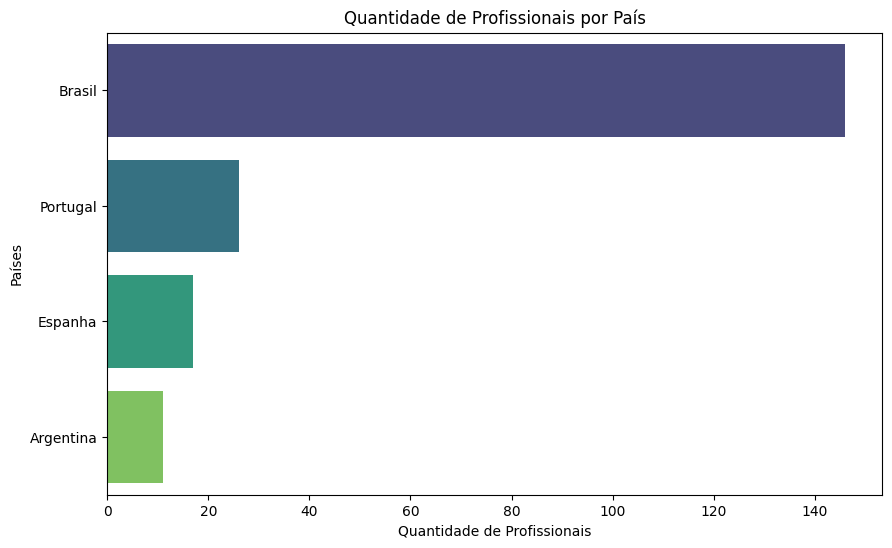

In [122]:
paises_comuns = df['País'].value_counts()

# Graficos

plt.figure(figsize=(10, 6))

sns.barplot(x=paises_comuns.values, y=paises_comuns.index, palette='viridis')

plt.title('Quantidade de Profissionais por País')
plt.xlabel('Quantidade de Profissionais')
plt.ylabel('Países')
plt.show()


### Criando um mapa de calor Geografico

In [123]:
import folium
from geopy.geocoders import Nominatim

In [124]:

# Criar um mapa centrado no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Configurar o geolocalizador
geolocator = Nominatim(user_agent="geoapi")


for cidade in df["Cidade"].unique():
    try:
        location = geolocator.geocode(cidade + ", Brasil")
        if location:
            folium.Marker([location.latitude, location.longitude], popup=cidade).add_to(mapa)
    except:
        pass  

mapa
